# 1D Nonlinear Convection

Now we're going to implement nonlinear convection using the same methods as in step 1.  The 1D convection equation is:

$$\frac{\partial u}{\partial t} + u \frac{\partial u}{\partial x} = 0$$

Instead of a constant factor $c$ multiplying the second term, now we have the solution $u$ multiplying it. Thus, the second term of the equation is now *nonlinear*. We're going to use the same discretization as in Step 1 — forward difference in time and backward difference in space. Here is the discretized equation.

$$\frac{u_i^{n+1}-u_i^n}{\Delta t} + u_i^n \frac{u_i^n-u_{i-1}^n}{\Delta x} = 0$$

Solving for the only unknown term, $u_i^{n+1}$, yields:

$$u_i^{n+1} = u_i^n - u_i^n \frac{\Delta t}{\Delta x} (u_i^n - u_{i-1}^n)$$

As before, the Python code starts by loading the necessary libraries. Then, we declare some variables that determine the discretization in space and time (you should experiment by changing these parameters to see what happens). Then, we create the initial condition $u_0$ by initializing the array for the solution using $u = 2\ @\ 0.5 \leq x \leq 1$  and $u = 1$ everywhere else in $(0,2)$ (i.e., a hat function).

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import animation, rc
from IPython.display import HTML

In [18]:
nx = 81
dx = 2 / (nx - 1)
dt = .005  #dt is the amount of time each timestep covers (delta t)
T = .5
nt = int(round(float(T)/dt)) #nt is the number of timesteps we want to calculate
L = 2

xs = np.linspace(0, 2, nx)

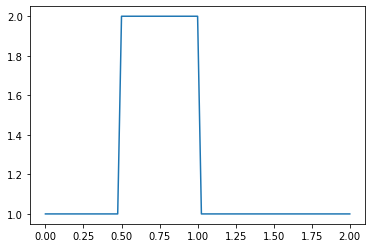

In [19]:
u = np.ones(nx)      #as before, we initialize u with every value equal to 1.
u[int(.5 / dx) : int(1 / dx + 1)] = 2  #then set u = 2 between 0.5 and 1 as per our I.C.s

un = np.ones(nx) #initialize our placeholder array un, to hold the time-stepped solution

plt.plot(np.linspace(0, 2, nx), u);

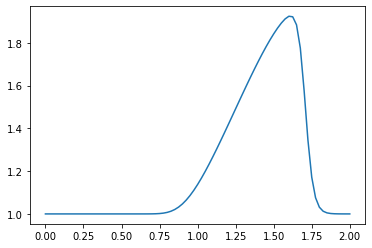

In [20]:
us = np.zeros((nt, nx))
for n in range(nt):  #iterate through time
    un = u.copy() ##copy the existing values of u into un
    for i in range(1, nx):  ##now we'll iterate through the u array
        u[i] = un[i] - un[i] * dt / dx * (un[i] - un[i-1])
    us[n,:] = u
        
plt.plot(xs, us[-1,:]); ##Plot the results

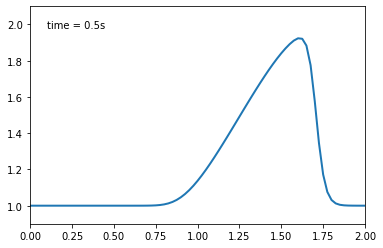

In [21]:
fig, ax = plt.subplots()

ax.set_xlim(( 0, L))
ax.set_ylim((.9, 2.1))

line, = ax.plot([], [], lw=2)
time_template = 'time = %.1fs'
time_text = ax.text(0.05, 0.9, '', transform=ax.transAxes)

def init():
    line.set_data([], [])
    time_text.set_text('')
    return line, time_text

def animate(i):
    y = us[i,:]
    line.set_data(xs, y)
    time_text.set_text(time_template%(i*dt))
    return line, time_text

anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=100, interval=20, 
                               blit=True)

HTML(anim.to_html5_video())